# Model Predictions on Validation Dataset with PyCaret
- For more information on pycaret, visit https://pycaret.readthedocs.io/en/latest/index.html
- Contact Cole (cole.hagen0001@temple.edu) with any questions, comments, or concerns

## Import Libraries 
## Create Confusion Matrix Function

In [1]:
import tsfel
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
from pycaret.classification import *
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Enter Filepath

In [1]:
filepath = input()

## Read Validation Feature File

In [2]:
unseen = pd.read_csv(filepath) 
#Selecting relevant features
x_train = unseen[["accxMean", "accyMean", "acczMean","anglexMean", "angleyMean", "anglezMean", "gyroxMean", "gyroyMean", "gyrozMean","classMedian"]]

In [ ]:
x_train = x_train[x_train['classMedian'] != 0]
x_train = x_train[x_train['classMedian'] != 1]
x_train['classMedian'] = x_train['classMedian'].replace(2, "reaching")
x_train['classMedian'] = x_train['classMedian'].replace(3, "lifting")
x_train['classMedian'] = x_train['classMedian'].replace(4, "push_pull")
x_train['classMedian'] = x_train['classMedian'].replace(5, "desktrans")
x_train['classMedian'] = x_train['classMedian'].replace(6, "deskfix")
x_train['classMedian'] = x_train['classMedian'].replace(7, "iso")

<AxesSubplot:ylabel='0_Mean'>

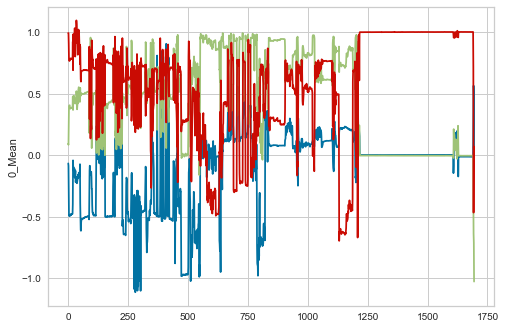

In [3]:
x_train

## Enter Saved Model Path

In [ ]:
saved_model = input()

## Apply Model to Validation Dataset

In [5]:
model = load_model(saved_model) #load participant model here
unseen_pred = predict_model(model, data=x_test)
unseen_pred

Transformation Pipeline and Model Successfully Loaded


,0_Min,0_Max,0_Mean,0_Standard deviation,1_Min,1_Max,1_Mean,1_Standard deviation,2_Min,2_Max,2_Mean,2_Standard deviation,Label,Score
0,-0.075684,-0.057617,-0.066230,0.004315,0.076172,0.107910,0.093076,0.006267,0.977051,1.006348,0.992690,0.006322,0,0.96
1,-0.166016,-0.063965,-0.085112,0.020747,0.034668,0.107910,0.084678,0.013415,0.942383,1.061523,0.991909,0.020337,0,0.94
2,-0.683594,-0.009766,-0.281558,0.163042,-0.055664,0.716309,0.222202,0.178275,0.491211,1.359375,0.905918,0.142339,0,0.83
3,-0.556152,-0.437500,-0.490806,0.017848,0.319824,0.479492,0.394033,0.030990,0.706055,0.896973,0.777173,0.030347,0,0.97
4,-0.506836,-0.464355,-0.487437,0.007910,0.375000,0.429688,0.402568,0.012839,0.729004,0.805664,0.768540,0.015133,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,-0.131348,0.123047,-0.003096,0.028683,-0.083008,0.046387,0.001016,0.015687,0.937500,1.020020,1.001191,0.009272,0,0.97
1691,-0.181641,1.165039,0.238672,0.325061,-1.094727,0.017090,-0.377500,0.335879,-0.501465,1.324707,0.715361,0.450311,0,0.76
1692,0.177734,0.883301,0.564961,0.134286,-1.261719,-0.131836,-0.637100,0.143085,-0.944824,-0.131836,-0.465562,0.133447,0,0.84
1693,-0.820801,2.651367,0.483154,0.499753,-1.814941,0.285645,-0.709141,0.400488,-1.362793,1.416504,0.070747,0.522590,1,0.66


## Visualize Predictions and Ground Truth over Time

<AxesSubplot:ylabel='Label'>

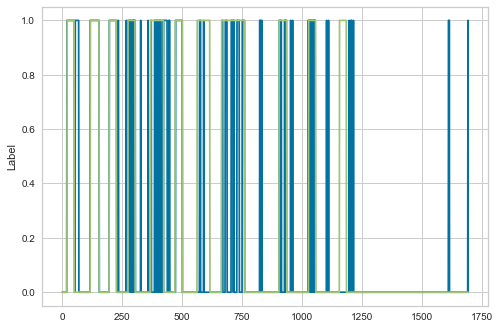

In [6]:
sns.lineplot(x=unseen_pred['Label'].index.values, y=unseen_pred["Label"])
sns.lineplot(x=unseen['classMedian'].index.values, y=unseen['classMedian'])

## Visualize Confusion Matrix

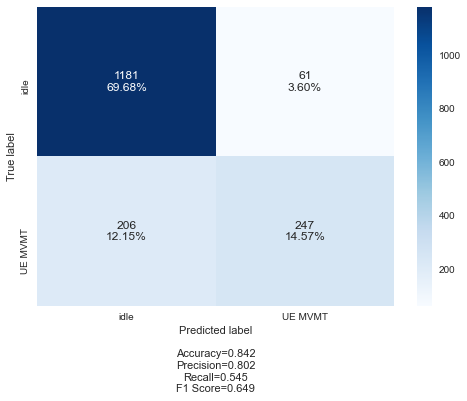

In [8]:
cm = confusion_matrix(x_train["classMedian"], unseen_pred["Label"])

#Modify categories to match training set
make_confusion_matrix(cm, categories=['deskfix', 'desktrans', 'iso', 'lifting', 'push_pull', 'reaching'])

## Assess Model Performance

In [10]:
print(classification_report(x_train["classMedian"], unseen_pred["Label"]))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      1242
         1.0       0.80      0.55      0.65       453

    accuracy                           0.84      1695
   macro avg       0.83      0.75      0.77      1695
weighted avg       0.84      0.84      0.83      1695

